# Telecom Churn Prediction - Assignment Notebook

**Author:** Michael Thomas & Supriyo Roy

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# #INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
# #(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

data = pd.read_csv("train.csv", index_col=None)
unseen = pd.read_csv("test.csv", index_col=None)
sample = pd.read_csv("sample.csv", index_col=None)
data_dict = pd.read_csv("data_dictionary.csv", index_col=None)


print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


# 2. Create X, y and then Train test split

Lets create X and y datasets and drop any column with only 1 unique value

In [4]:
data['circle_id'].unique()

array([109])

In [5]:
X = data.drop(['circle_id'], axis='columns').iloc[:, :-1]
y = data.iloc[:, -1]

X.shape, y.shape


((69999, 170), (69999,))

In [6]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64


In [7]:
print(X.columns)

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=170)


In [8]:
X.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0
2,2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0
3,3,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0
4,4,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0


In [11]:
# Define a threshold for finding a few unique values
threshold = 1

# Find columns with unique value counts below the threshold
few_unique_cols = {col: X[col].nunique() for col in X.columns if X[col].nunique() <= threshold}

# Display the columns and their unique counts
print(few_unique_cols)



{}


In [12]:
# Filter out columns with only one unique value
single_value_columns = [col for col in X.columns if X[col].nunique() == 1]

# Drop these columns from the DataFrame
X = X.drop(columns=single_value_columns)

# Display the shape of the updated DataFrame to confirm columns were dropped
X.shape


(69999, 158)

<Axes: >

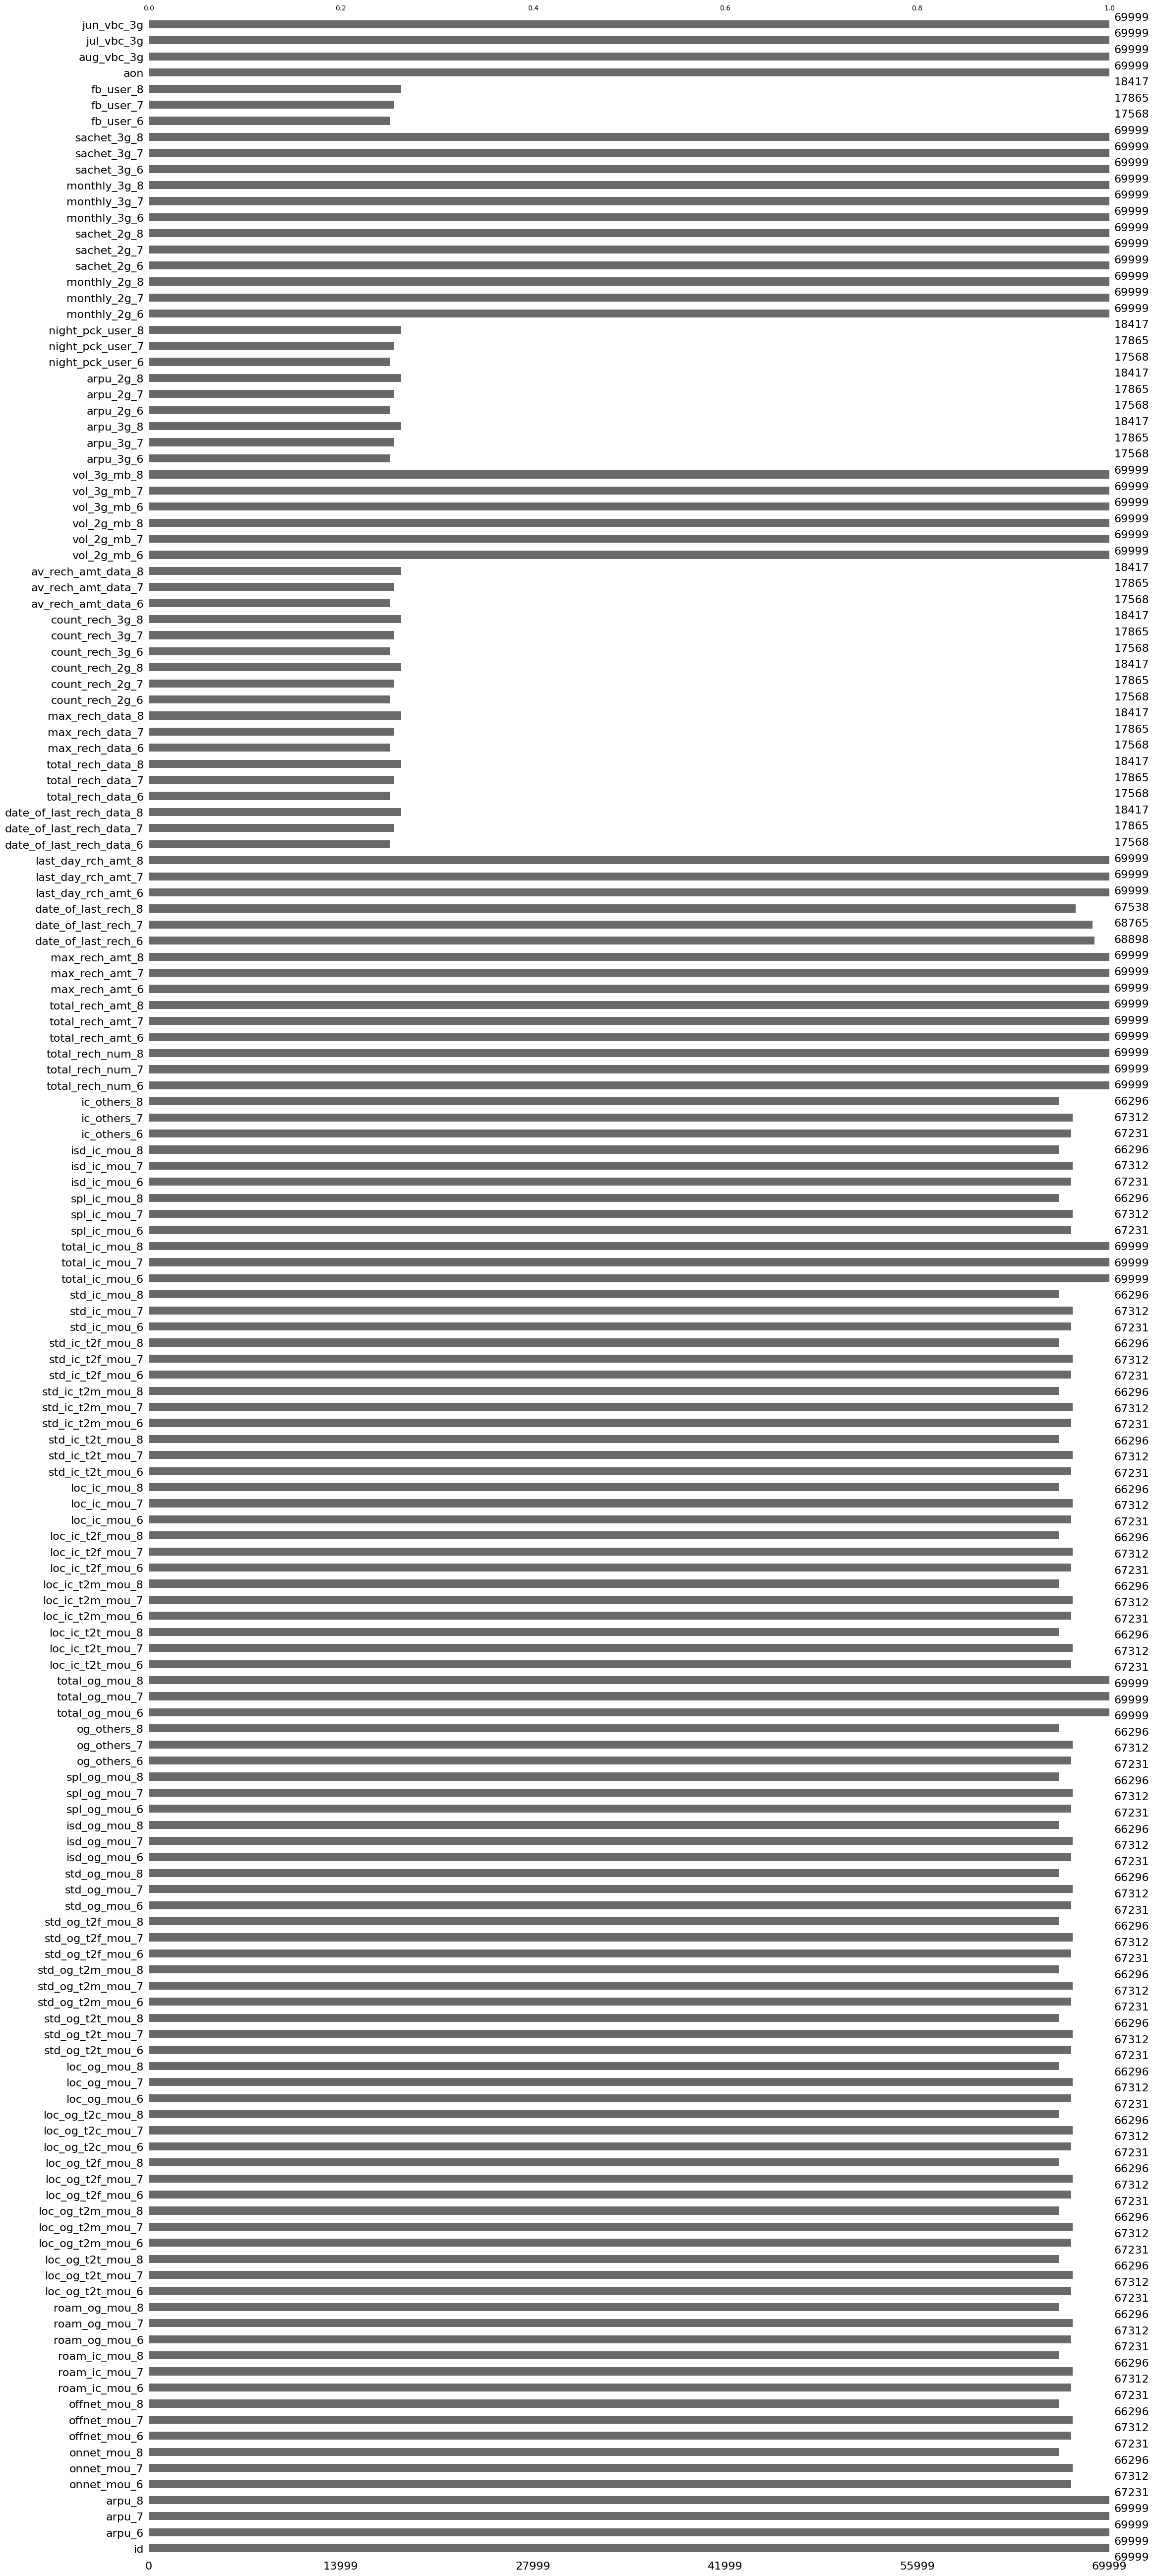

In [19]:
msno.bar(X)

In [20]:
missing_data_percent = 100*X.isnull().sum()/len(y_train)
missing_data_percent

id              0.000000
arpu_6          0.000000
arpu_7          0.000000
arpu_8          0.000000
onnet_mou_6     4.942945
                 ...    
fb_user_8      92.112359
aon             0.000000
aug_vbc_3g      0.000000
jul_vbc_3g      0.000000
jun_vbc_3g      0.000000
Length: 158, dtype: float64

In [21]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=128)

In [22]:
X_filtered = X[new_vars]
X_filtered.shape

(69999, 128)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((55999, 128), (14000, 128), (55999,), (14000,))

In [24]:
X_train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
4469,4469,278.156,358.954,291.868,205.44,432.09,303.01,118.83,155.44,93.51,...,0,0,0,0,0,0,3651,0.00,0.0,0.00
60952,60952,1188.408,975.558,840.624,18.98,10.23,17.63,153.16,217.08,186.98,...,4,3,2,0,0,0,709,1305.55,2017.5,1509.55
69938,69938,749.511,707.940,181.968,102.53,51.88,36.73,1611.28,1520.08,208.44,...,0,0,0,0,0,0,232,0.00,0.0,0.00
56146,56146,293.569,257.900,170.928,21.48,0.00,3.79,186.54,220.66,133.78,...,0,0,0,0,0,0,2974,0.00,0.0,0.00
14270,14270,86.734,52.469,33.201,8.13,5.43,4.43,50.73,22.54,14.01,...,0,0,0,0,0,0,570,0.00,0.0,0.00


# 3. Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

In [52]:
# Display the data types of each column
print(X_train.dtypes)


id               int64
arpu_6         float64
arpu_7         float64
arpu_8         float64
onnet_mou_6    float64
                ...   
sachet_3g_8      int64
aon              int64
aug_vbc_3g     float64
jul_vbc_3g     float64
jun_vbc_3g     float64
Length: 128, dtype: object


In [53]:
# Display column names that are not numerical
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)


Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')


In [54]:
# Select and print the data types of non-numeric columns
non_numeric_dtypes = X_train.select_dtypes(exclude=[np.number]).dtypes
print(non_numeric_dtypes)


date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
dtype: object


In [55]:
# Convert all columns to numeric, setting non-numeric values to NaN
X_train_filtered = X_train_filtered.apply(pd.to_numeric, errors='coerce')

<Axes: >

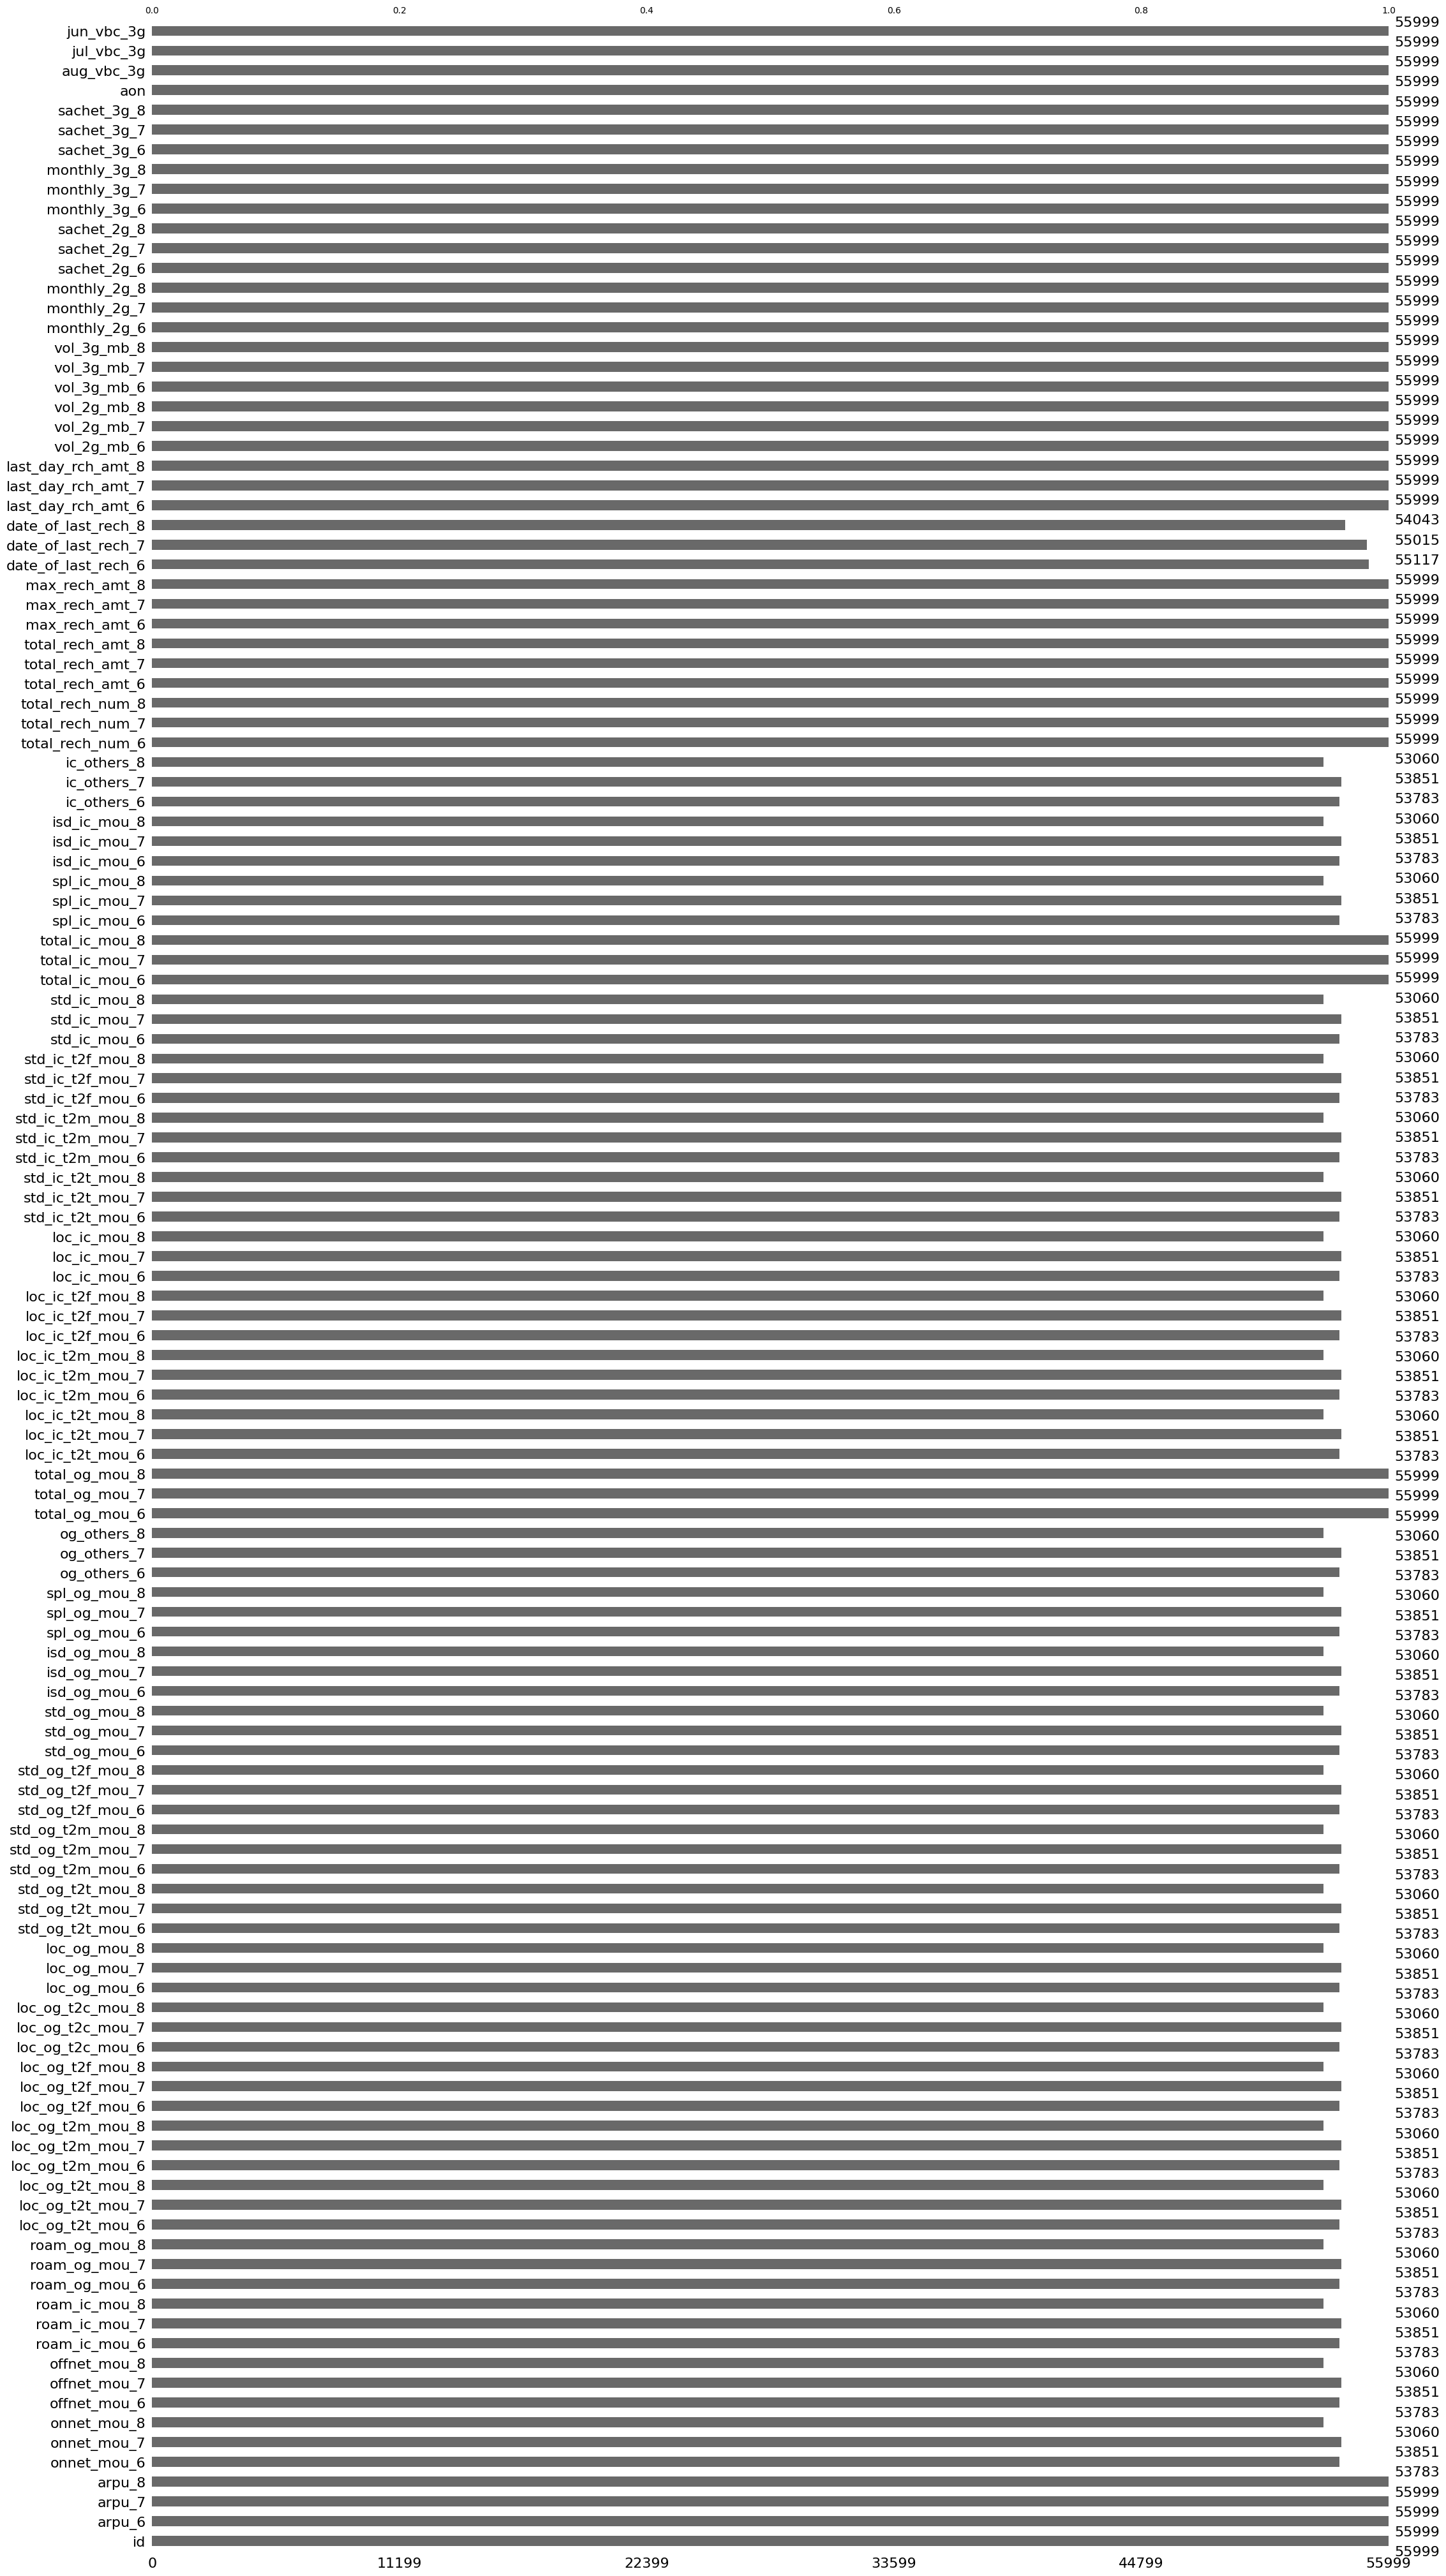

In [56]:
msno.bar(X_train)

In [57]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [58]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

<Axes: >

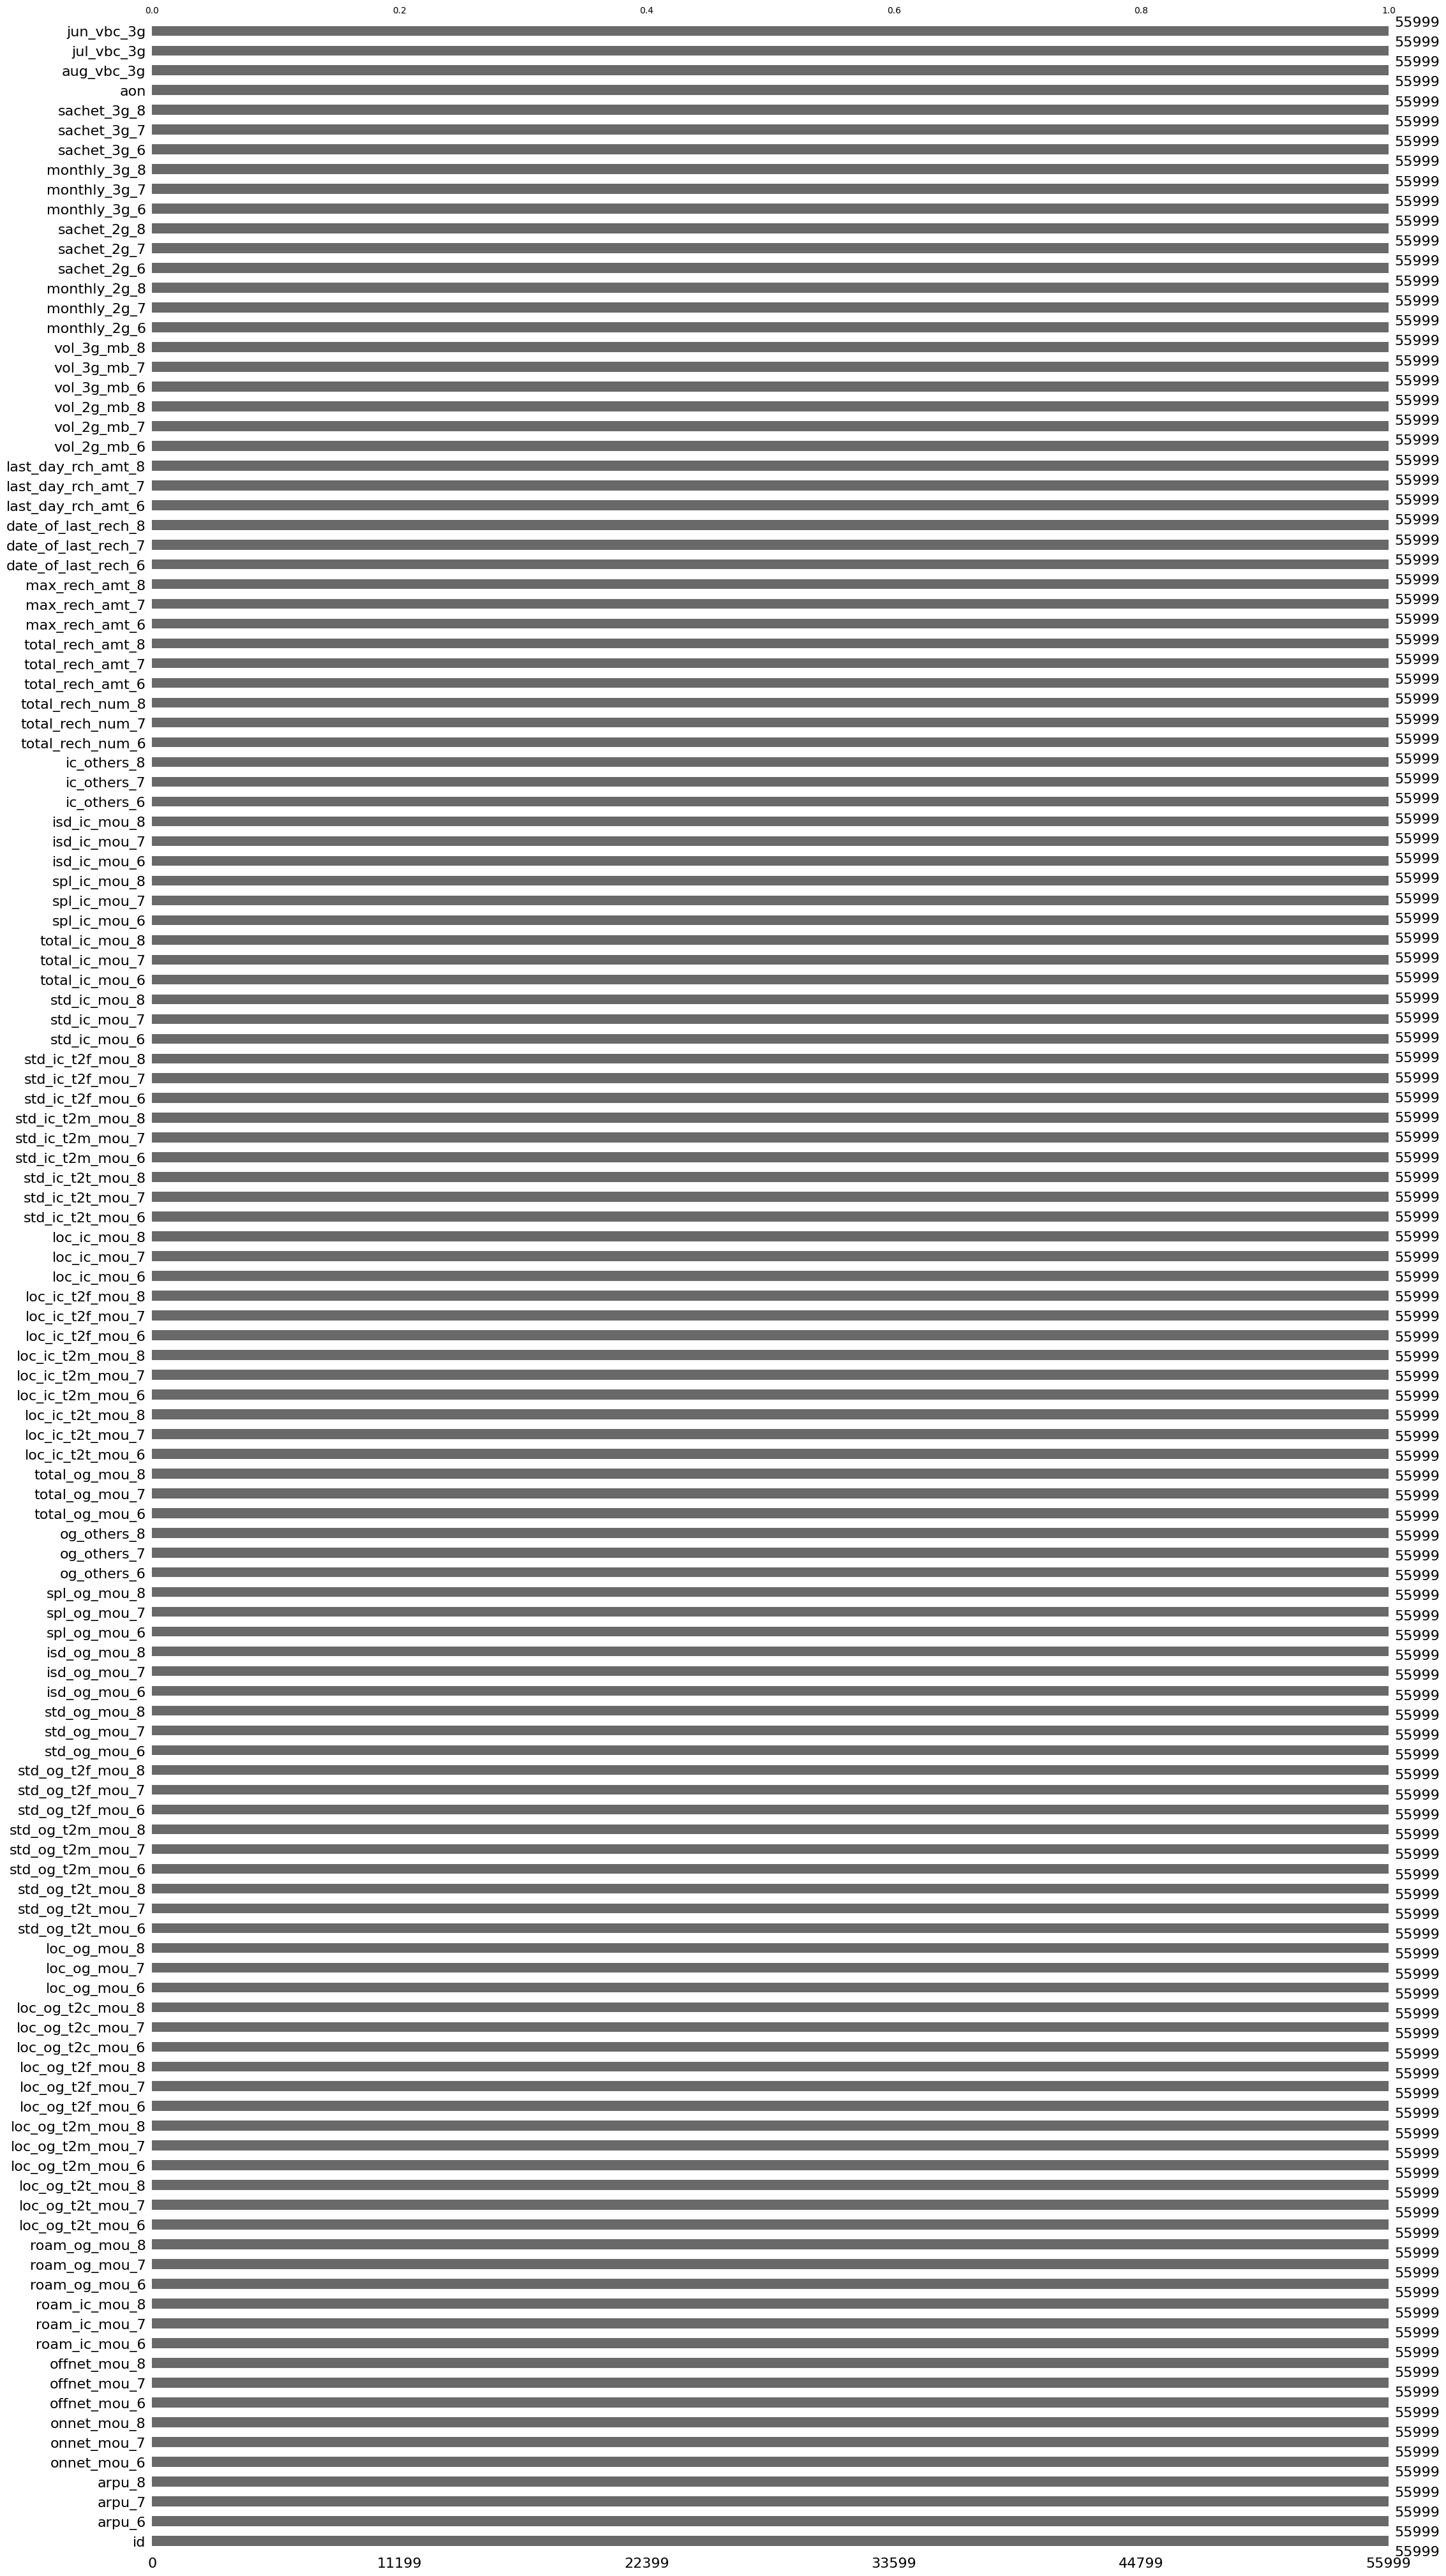

In [59]:
msno.bar(X_train_filtered)

In [60]:
X_train_filtered.describe()


,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,34941.356292,268.870515,264.217862,264.916866,102.496605,102.559066,100.705733,168.833616,167.692694,164.980736,...,0.058491,0.058979,0.063128,0.051893,0.056533,0.058376,1220.956971,54.663669,52.186344,47.362531
std,20225.906889,244.120175,243.871273,247.502096,164.123702,167.553257,165.805219,206.409274,209.987840,208.274980,...,0.238742,0.243354,0.251525,0.259024,0.286347,0.296579,952.182827,169.696013,167.421204,156.917389
min,1.000000,-474.130699,-479.269558,-490.173750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,17424.500000,92.926500,86.743000,84.519500,5.380000,4.880000,4.090000,28.560000,26.610000,23.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000,0.000000,0.000000,0.000000
50%,34860.000000,196.568000,191.885000,192.538000,30.690000,29.310000,27.980000,89.380000,85.490000,83.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,869.000000,0.000000,0.000000,0.000000
75%,52513.500000,369.110500,365.110500,369.949000,112.785000,108.935000,106.350000,223.285000,218.280000,216.105000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1811.000000,0.000000,0.000000,0.000000
max,69998.000000,1014.404504,1010.510830,1022.990183,639.548451,652.369699,644.985314,815.932928,826.833131,818.720551,...,1.142048,1.219526,1.226892,1.808700,2.027070,2.181213,4078.416578,842.635596,848.638809,827.497263


# 4. Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

<Axes: >

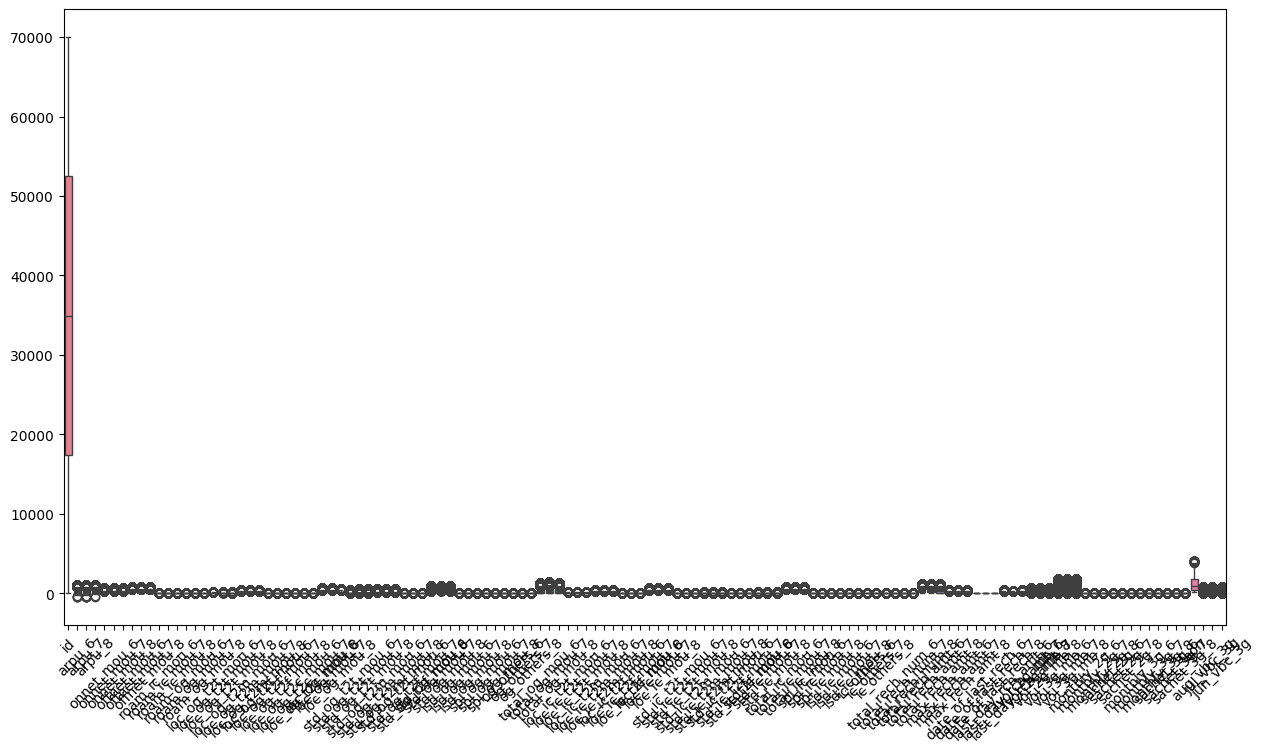

In [61]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

### 4.1 Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [62]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

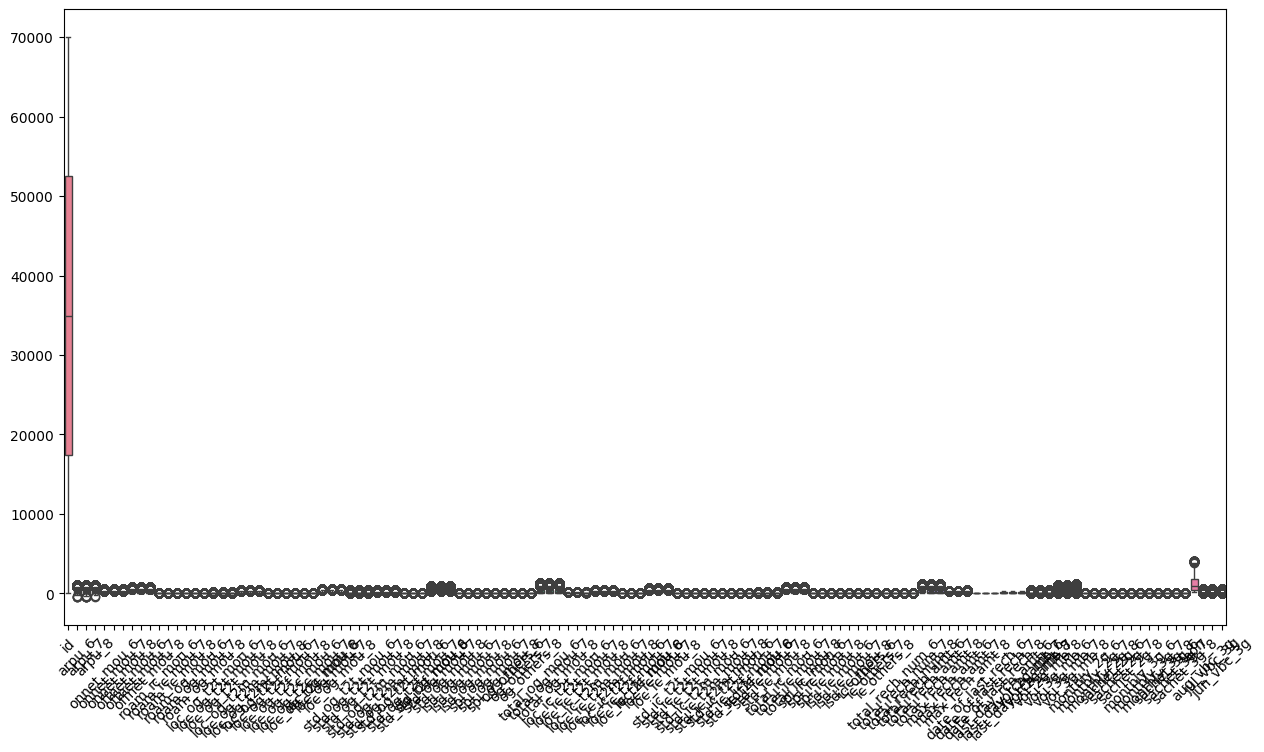

In [63]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)

### 4.2 Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [64]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train_filtered1)

<Axes: >

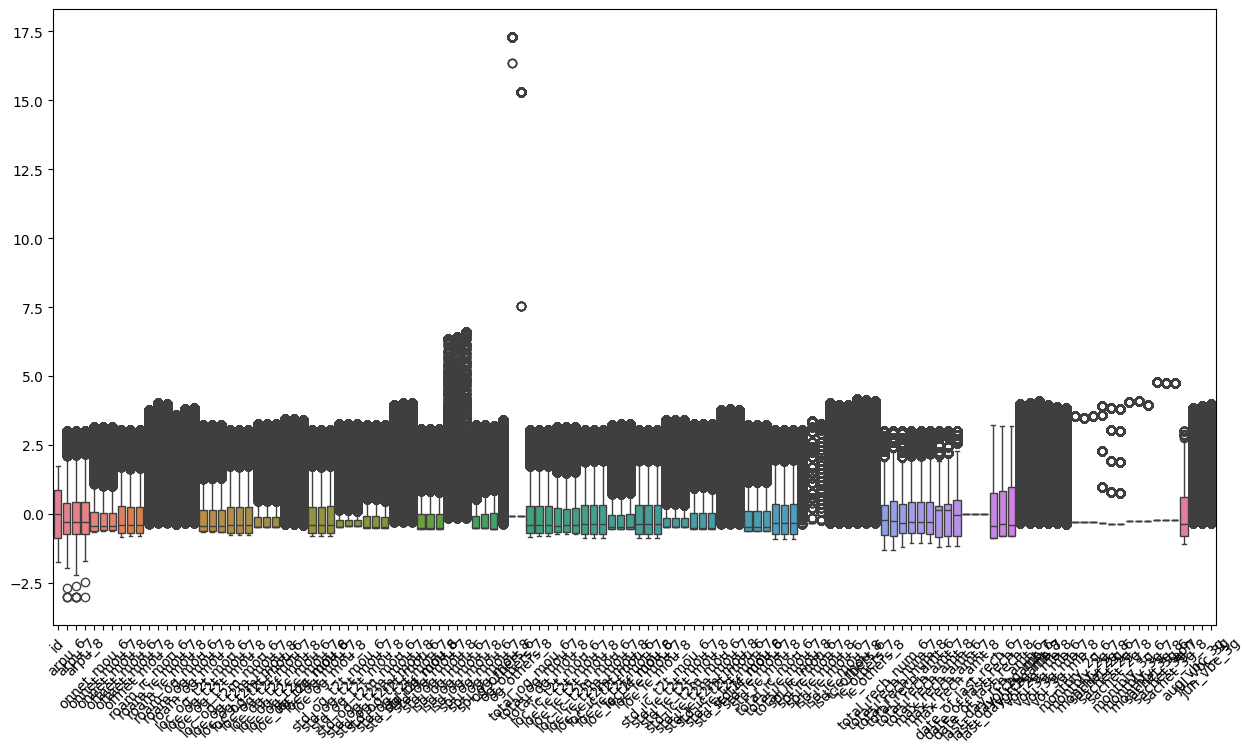

In [65]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered2, columns=new_vars))

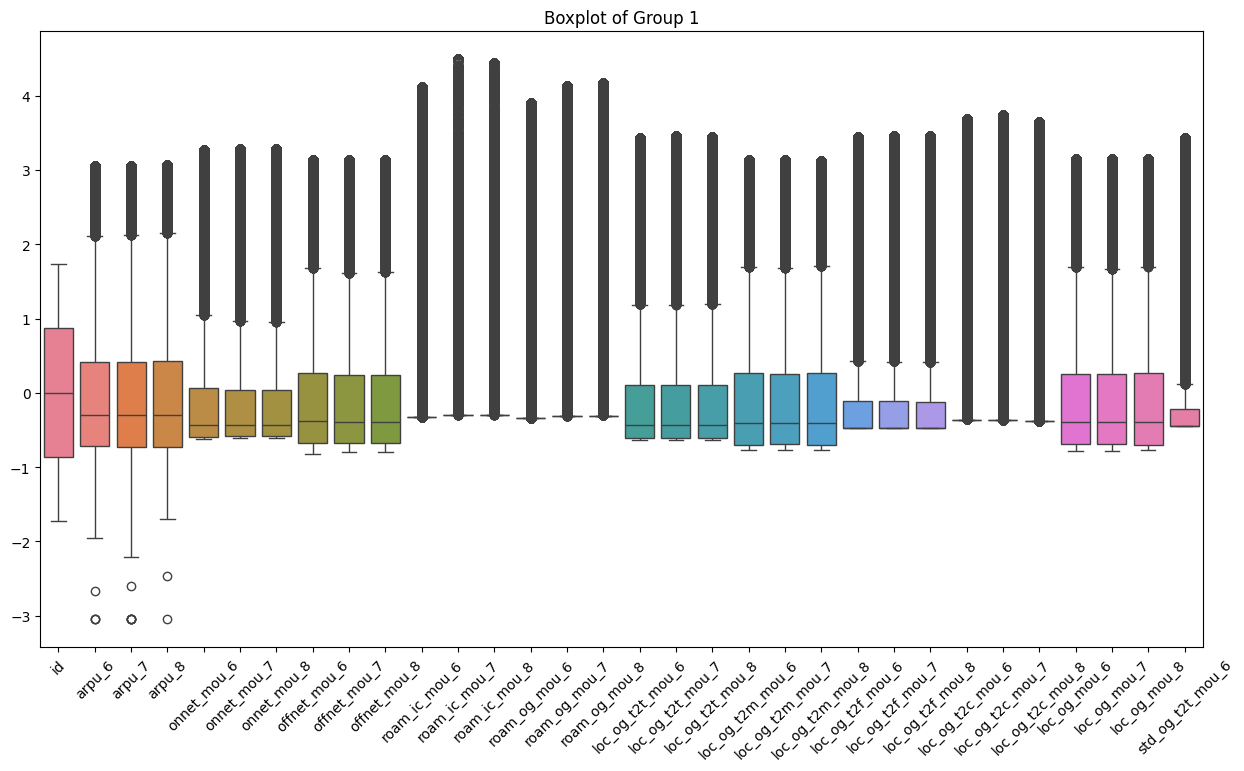

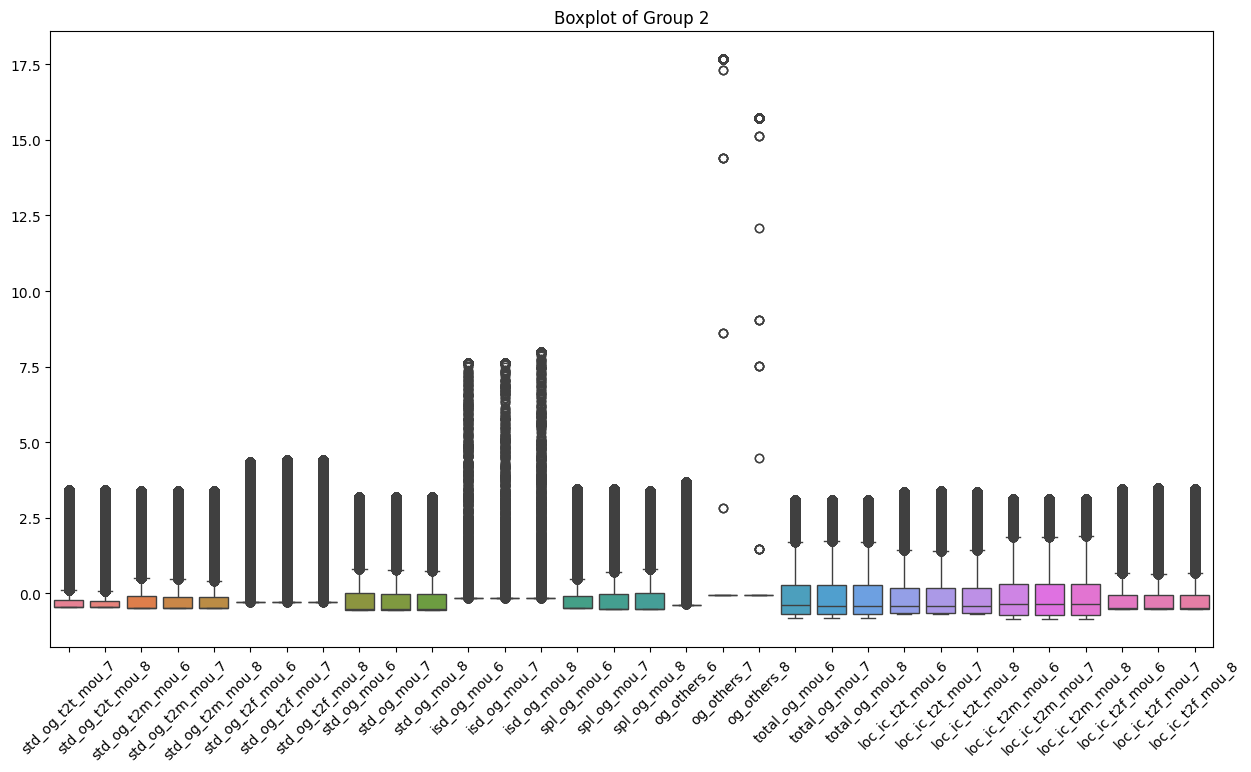

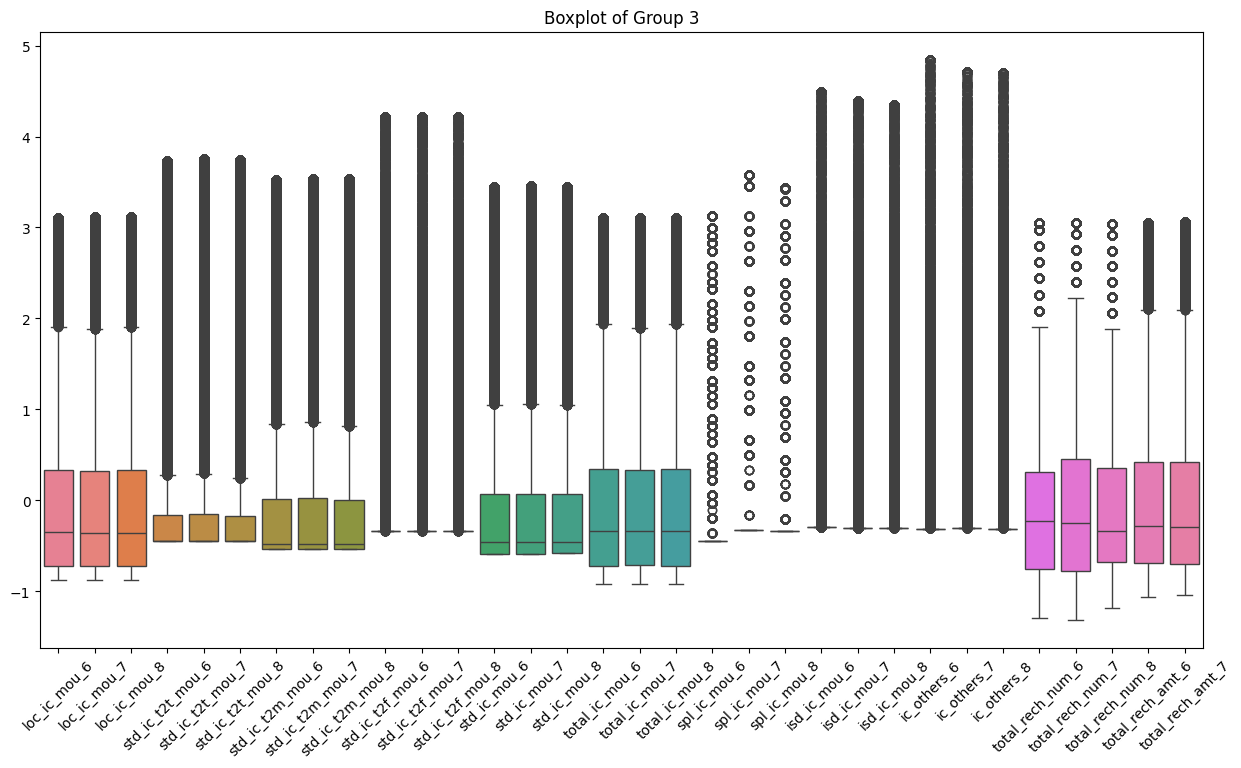

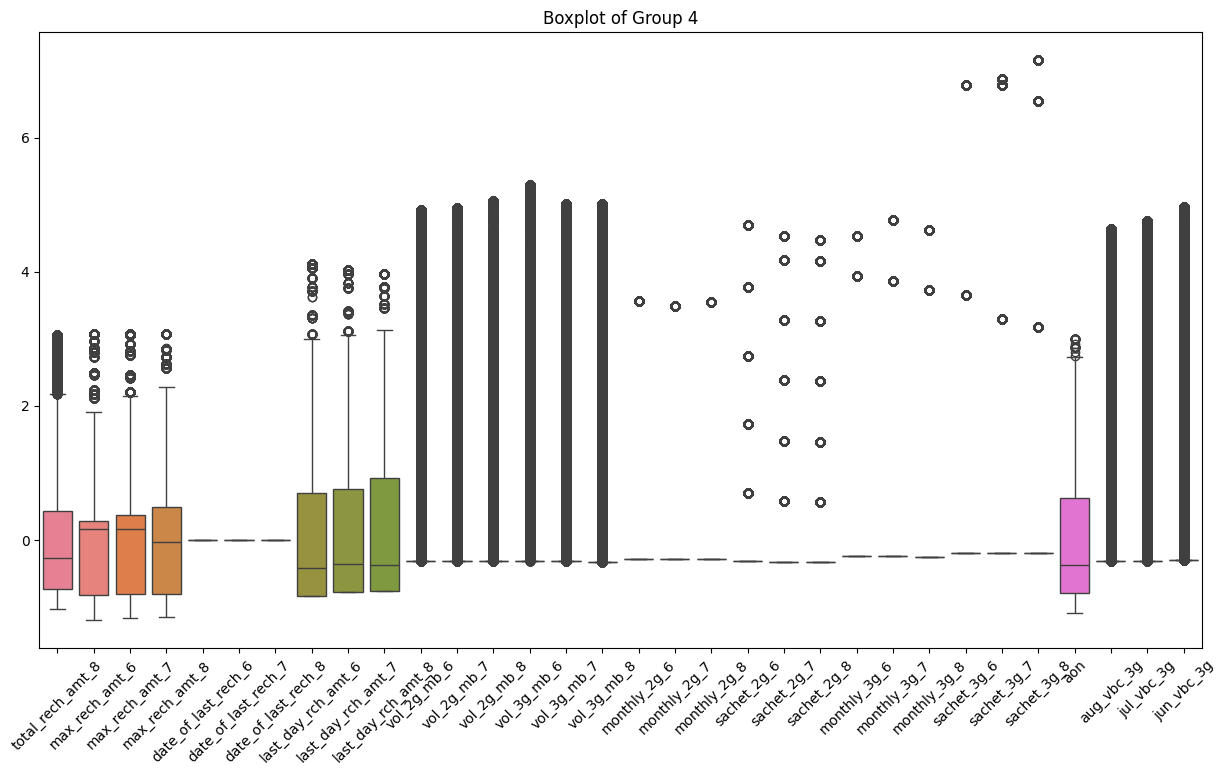

In [51]:
# Convert X_train_filtered2 to a DataFrame with column names from new_vars
X_train_filtered2_df = pd.DataFrame(X_train_filtered2, columns=new_vars)

# Define the number of groups
num_groups = 4
columns_per_group = len(new_vars) // num_groups

# Create separate boxplots for each group of columns
for i in range(num_groups):
    # Select the subset of columns for this group
    start = i * columns_per_group
    end = (i + 1) * columns_per_group if i != num_groups - 1 else len(new_vars)
    group_columns = new_vars[start:end]
    
    # Create the boxplot for the current group by selecting only the relevant columns
    plt.figure(figsize=(15, 8))
    plt.xticks(rotation=45)
    sns.boxplot(data=X_train_filtered2_df[group_columns])
    plt.title(f"Boxplot of Group {i + 1}")
    plt.show()